In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
ibov = pd.read_csv('ibovfull-emerson.csv', parse_dates=[0], index_col="data")
ibov = ibov[['ult']]
#ibov1 = ibov.iloc[:100]

ibovf = pd.read_csv('ibovfull-emerson.csv')

<ipython-input-12-c59ed880904e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ibov = pd.read_csv('ibovfull-emerson.csv', parse_dates=[0], index_col="data")


In [ ]:
ibov.head()

,ult
data,
2024-02-02,127182
2024-01-02,128481
2024-01-31,127752
2024-01-30,127402
2024-01-29,128503


In [ ]:
ibov.tail()

,ult
data,
2001-04-01,16675
2001-03-01,16599
2001-02-01,15425
2000-12-28,15259
2000-12-27,15186


In [ ]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5722 entries, 2024-02-02 to 2000-12-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ult     5722 non-null   int64
dtypes: int64(1)
memory usage: 89.4 KB


In [ ]:
ibov.describe().round(2)

,ult
count,5722.00
mean,60103.01
std,32005.72
min,8371.00
25%,37861.75
50%,56913.00
75%,77802.00
max,134194.00


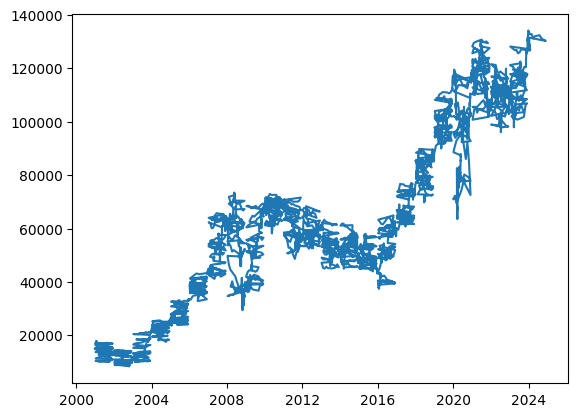

In [ ]:
plt.plot(ibov.index, ibov.ult)
ibov.info()

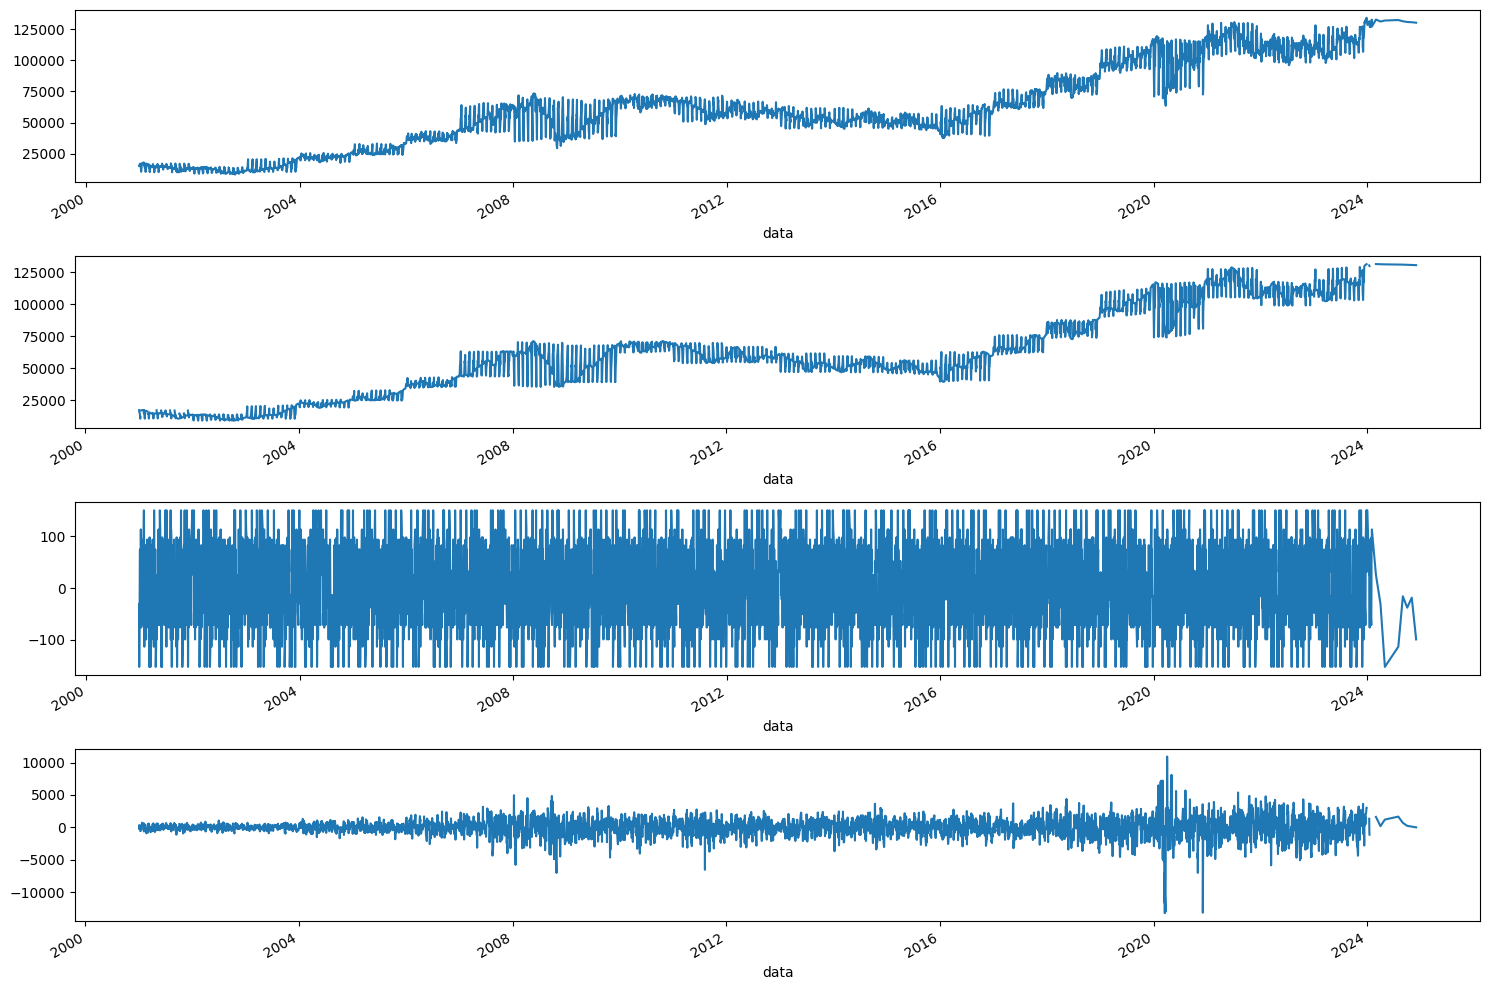

In [ ]:
resultados = seasonal_decompose(ibov, period=25)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [ ]:
# Teste Dickey Fuller (Série é estacionária?) -> H0 - NÃO É estacionária; H1 - É estacionária
X = ibov.ult.values
Resultado_ADF = adfuller(X)
print(f'Teste Estatístico: {Resultado_ADF[0]}')
print(f'P-value: {Resultado_ADF[1]}')
print('Valores Críticos:')
for k, value in Resultado_ADF[4].items():
  print(f'\t{k}: {value}')

#Série NÃO É estacionária -> Usando um intervalo de confiança de 95%. O p-vaue é > que o nível de significância.
#Além disso, o teste estatístico é maior que o valor crítico num nível de 5%.

Teste Estatístico: -1.765410378038923
P-value: 0.3977645963842519
Valores Críticos:
	1%: -3.431495751697216
	5%: -2.862046312212644
	10%: -2.5670395082213586


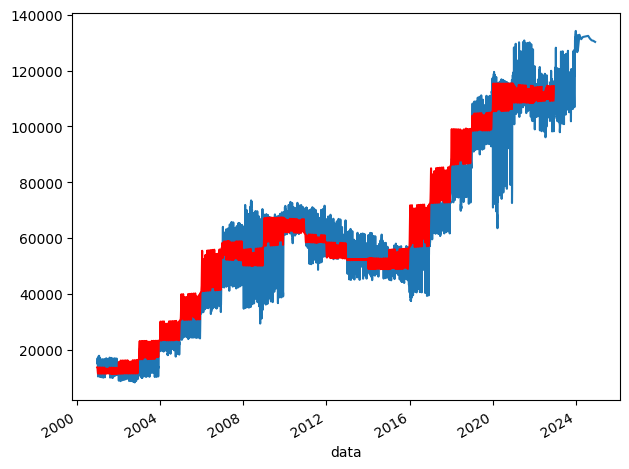

In [ ]:
 ma = ibov.rolling(365).mean()
 f, ax = plt.subplots()
 ibov.plot(ax=ax, legend=False)
 ma.plot(ax=ax, legend=False, color='r')
 plt.tight_layout()

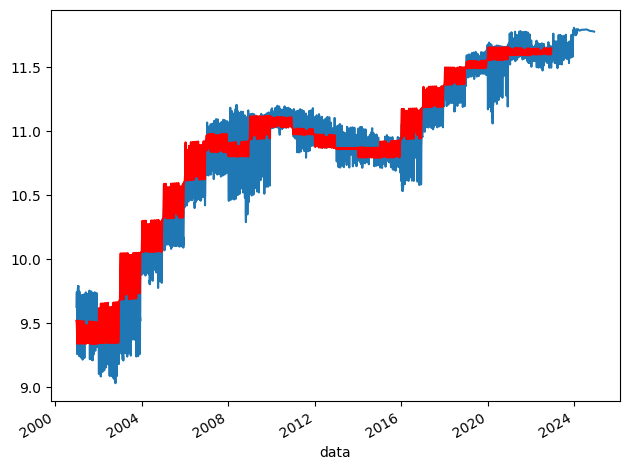

In [ ]:
log_ibov = np.log(ibov)
log_ma = log_ibov.rolling(365).mean()
f, ax = plt.subplots()
log_ibov.plot(ax=ax, legend=False)
log_ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

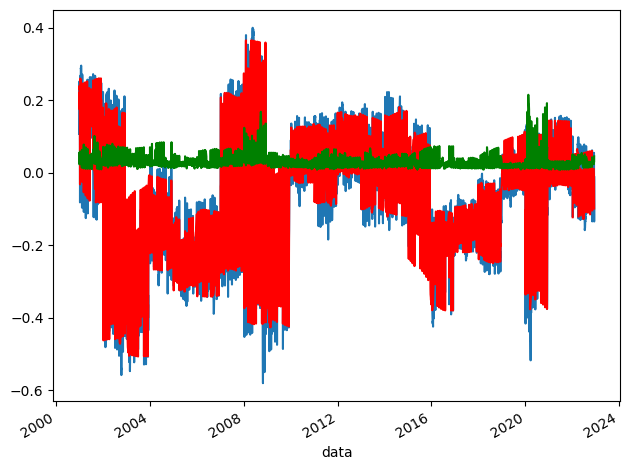

In [ ]:
s_ibov = (log_ibov - log_ma).dropna()
s_ma = s_ibov.rolling(25).mean()
std = s_ibov.rolling(25).std()

f, ax = plt.subplots()
s_ibov.plot(ax=ax, legend=False)
s_ma.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [ ]:
# Teste Dickey Fuller (Série é estacionária?) -> H0 - NÃO É estacionária; H1 - É estacionária
s_X = s_ibov.ult.values
s_Resultado_ADF = adfuller(s_X)
print(f'Teste Estatístico: {s_Resultado_ADF[0]}')
print(f'P-value: {s_Resultado_ADF[1]}')
print('Valores Críticos:')
for k, value in s_Resultado_ADF[4].items():
  print(f'\t{k}: {value}')

#Série É estacionária -> Usando um intervalo de confiança de 95%. O p-vaue é < que o nível de significância.
#Além disso, o teste estatístico é menor que o valor crítico num nível de 5%.

Teste Estatístico: -3.913797437267901
P-value: 0.0019356196590803669
Valores Críticos:
	1%: -3.4315754067842485
	5%: -2.8620815048580397
	10%: -2.5670582423915507


Teste Estatístico: -15.936473903343728
P-value: 7.625721761172578e-29
Valores Críticos:
	1%: -3.4315754067842485
	5%: -2.8620815048580397
	10%: -2.5670582423915507


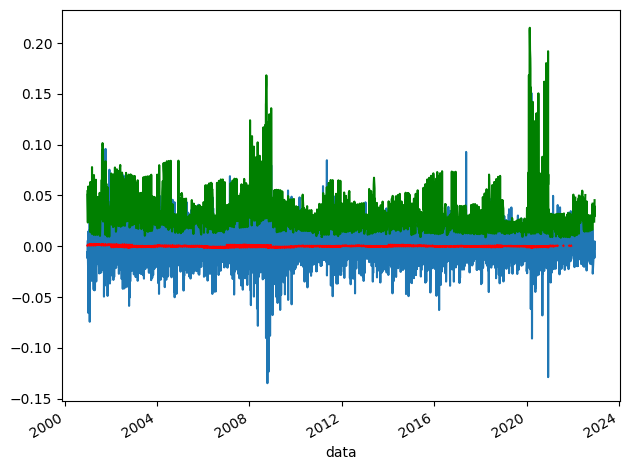

In [ ]:
# Teste Dickey Fuller (Série é estacionária?) -> H0 - NÃO É estacionária; H1 - É estacionária
dif_ibov = s_ibov.diff(1)
dif_ma = dif_ibov.rolling(365).mean()

std.diff = dif_ibov.rolling(365).std()


f, ax = plt.subplots()
dif_ibov.plot(ax=ax, legend=False)
dif_ma.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

dif_X = dif_ibov.ult.dropna().values
dif_Resultado_ADF = adfuller(dif_X)
print(f'Teste Estatístico: {dif_Resultado_ADF[0]}')
print(f'P-value: {dif_Resultado_ADF[1]}')
print('Valores Críticos:')
for k, value in dif_Resultado_ADF[4].items():
  print(f'\t{k}: {value}')

  #Série É estacionária -> Usando um intervalo de confiança de 95%. O p-vaue é < que o nível de significância.
#Além disso, o teste estatístico é menor que o valor crítico num nível de 5%.

In [ ]:
lag_acf = acf(dif_ibov.dropna(), nlags=25)
lag_pacf = pacf(dif_ibov.dropna(), nlags=25)


lag_acf = acf(dif_ibov.dropna(), nlags=25)


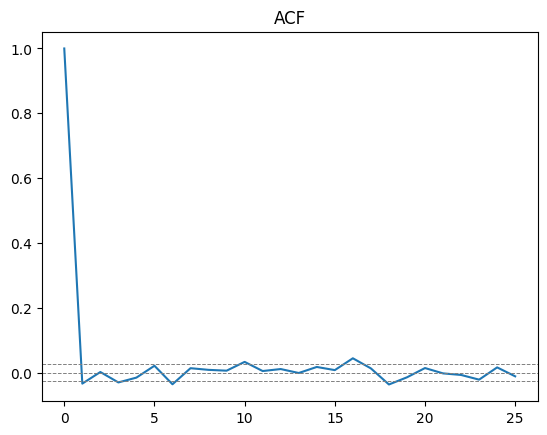

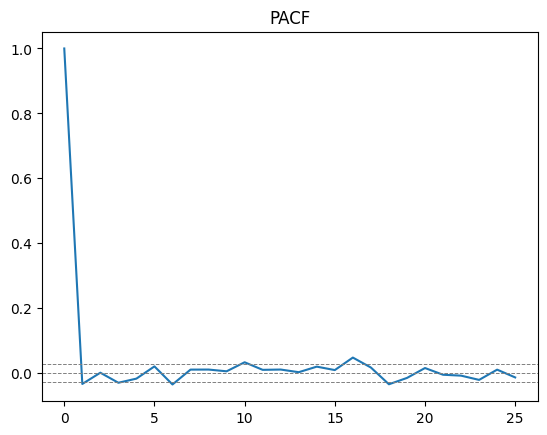

In [ ]:
#5% ACF

plt.plot(lag_acf)
plt.axhline(y = -1.96/(np.sqrt((len(dif_ibov)-1))), linestyle='--',color='gray', linewidth=0.7)
plt.axhline(y = 0, linestyle='--',color='gray', linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt((len(dif_ibov)-1))), linestyle='--',color='gray', linewidth=0.7)
plt.title("ACF")
plt.show()

#5% ACF

plt.plot(lag_pacf)
plt.axhline(y = -1.96/(np.sqrt((len(dif_ibov)-1))), linestyle='--',color='gray', linewidth=0.7)
plt.axhline(y = 0, linestyle='--',color='gray', linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt((len(dif_ibov)-1))), linestyle='--',color='gray', linewidth=0.7)
plt.title("PACF")
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


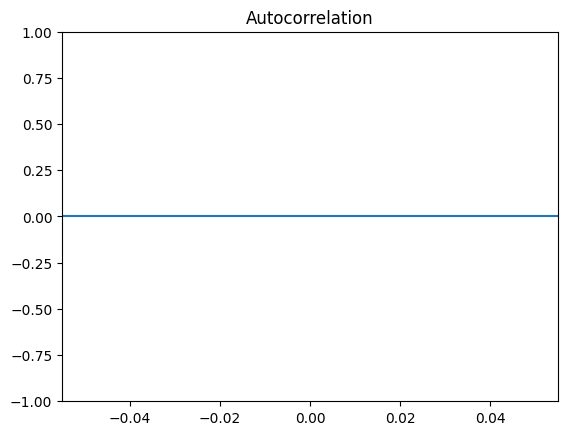

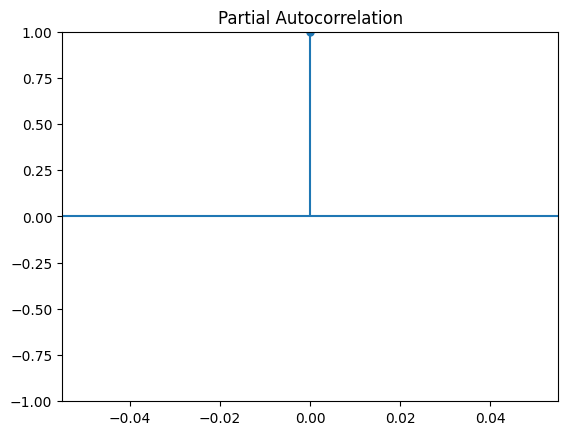

In [ ]:
plot_acf(dif_ibov.ult)
plot_pacf(dif_ibov.ult)
plt.show()